# practice 1. 단순 선형 회귀와 R square

다이아몬드 데이터 셋에서 독립 변수를 하나 선택하여 가격을 예측하는 선형 회귀 모델을 만들어보세요. 독립 변수를 바꿔가면서 모델을 학습시켜 보고, r square 값을 비교해보세요. 그리고 독립변수나 종속 변수에 로그를 씌워주는 등의 전처리를 한 뒤, 모델을 학습시킨 다음 결과를 비교해보세요.

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [17]:
df = pd.read_csv("./data/diamonds.csv")
X = df.drop(["price"], axis=1)
y = df["price"]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234) 

In [18]:
x_train

,carat,cut,color,clarity,depth,table,x,y,z
5463,1.23,Very Good,H,I1,61.9,60.6,6.79,6.85,4.22
13984,1.24,Premium,H,SI2,61.2,57.0,7.02,6.87,4.25
9681,1.00,Ideal,I,SI1,62.5,56.0,6.38,6.41,4.00
9473,1.03,Premium,H,SI1,61.1,59.0,6.56,6.50,3.99
37376,0.40,Ideal,I,IF,62.4,56.0,4.70,4.73,2.94
...,...,...,...,...,...,...,...,...,...
32399,0.38,Ideal,I,VVS1,61.6,56.0,4.68,4.71,2.89
17048,0.30,Ideal,F,VS1,62.1,55.0,4.31,4.35,2.69
23924,2.01,Ideal,J,SI1,62.1,56.0,8.08,8.03,5.00
34086,0.36,Premium,E,VS1,60.4,58.0,4.64,4.67,2.81


In [3]:
y_train

5463      3835
13984     5694
9681      4649
9473      4603
37376      982
         ...  
32399      791
17048      612
23924    12048
34086      852
27439    18066
Name: price, Length: 43152, dtype: int64

### 데이터 전처리

In [5]:
#범주형 변수들 원핫 인코딩
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

In [7]:
import pandas as pd

In [115]:
x_train = x_train.drop(["cut", "color", "clarity"], axis=1)
x_test = x_test.drop(["cut", "color", "clarity"], axis=1)

In [117]:
columns_list = x_train.columns.tolist()

In [118]:
columns_list

['carat', 'depth', 'table', 'x', 'y', 'z']

## EDA

In [15]:
x_train

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
5463,1.23,61.9,60.6,6.79,6.85,4.22,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13984,1.24,61.2,57.0,7.02,6.87,4.25,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
9681,1.00,62.5,56.0,6.38,6.41,4.00,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
9473,1.03,61.1,59.0,6.56,6.50,3.99,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
37376,0.40,62.4,56.0,4.70,4.73,2.94,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399,0.38,61.6,56.0,4.68,4.71,2.89,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
17048,0.30,62.1,55.0,4.31,4.35,2.69,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
23924,2.01,62.1,56.0,8.08,8.03,5.00,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
34086,0.36,60.4,58.0,4.64,4.67,2.81,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [80]:
from matplotlib import pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
font_path = r"C:\Windows\Fonts\MALGUN.TTF" #폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [38]:
columns_list = x_train.columns.tolist()

In [41]:
columns_list

['carat',
 'depth',
 'table',
 'x',
 'y',
 'z',
 'cut_Fair',
 'cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_D',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'clarity_I1',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2',
 'price']

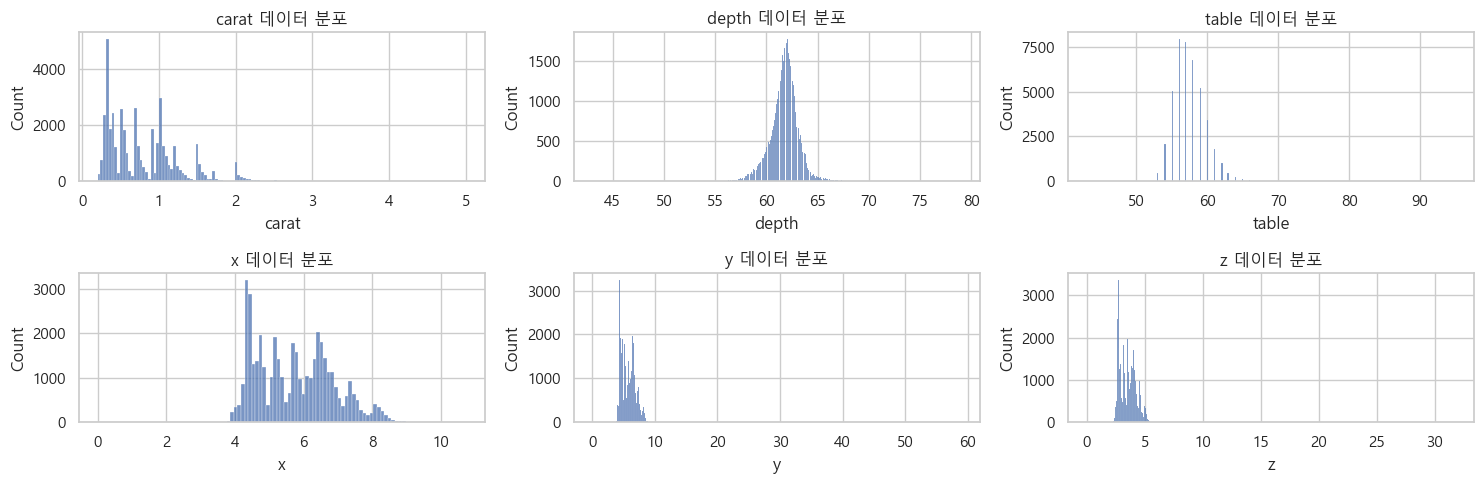

In [93]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))

for i, column in enumerate(columns_list):
    font_path = r"C:\Windows\Fonts\MALGUN.TTF" #폰트 파일 위치
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)

        
    plt.subplot(2, 3, i+1)  # 2행 3열로 i+1번째 그래프 위치 지정
    sns.histplot(data=x_train[column])
    plt.title(f"{column} 데이터 분포")

plt.tight_layout()
plt.show()

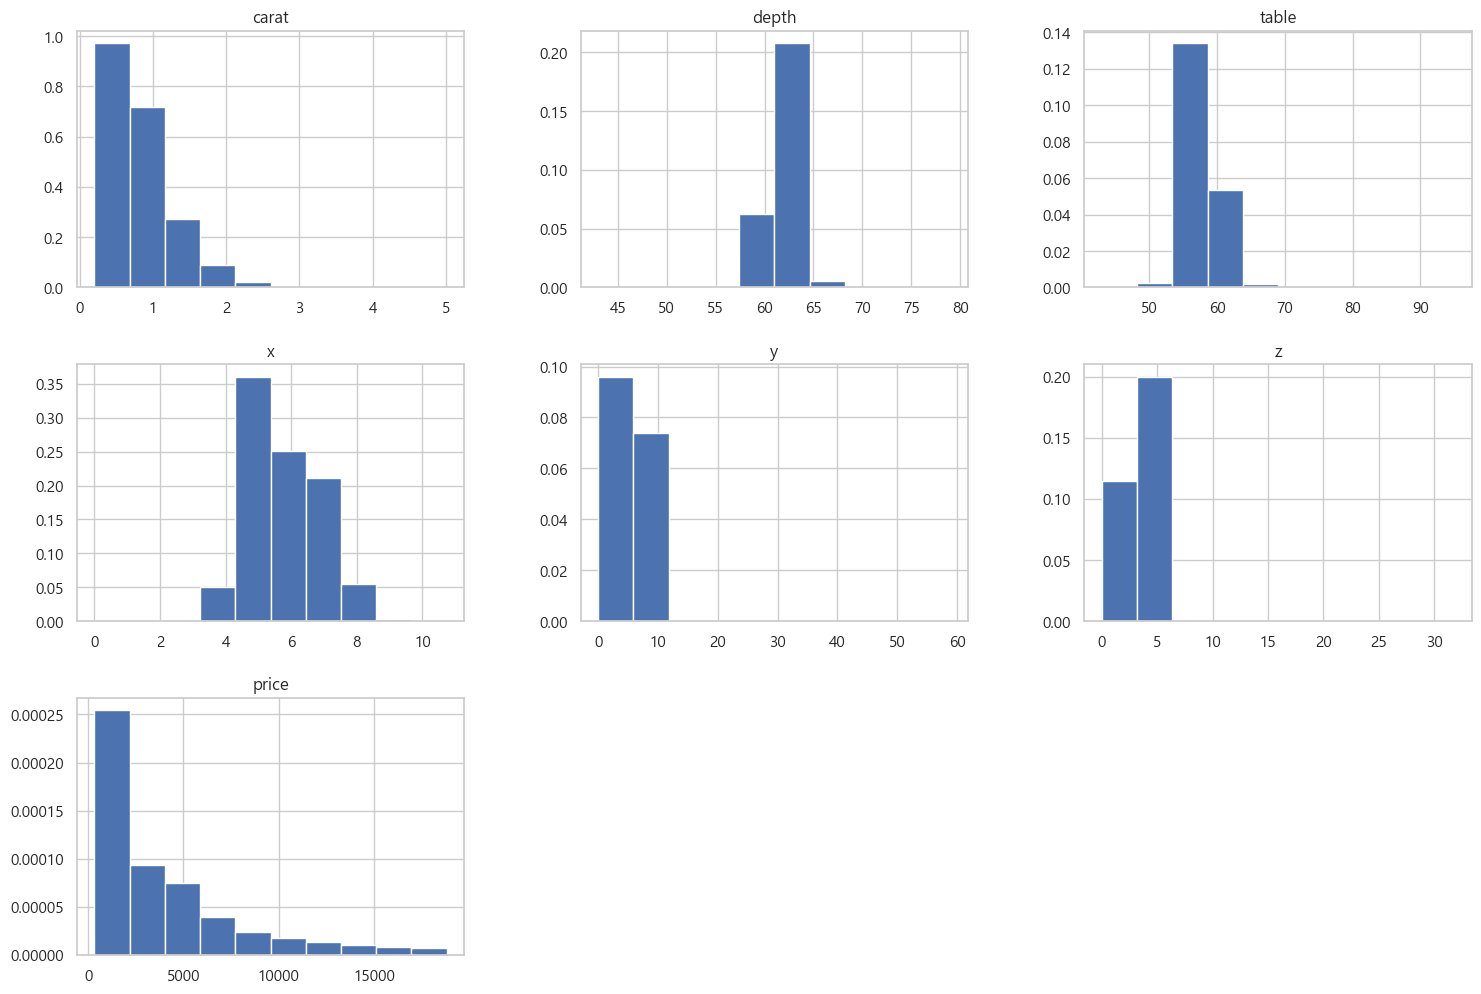

In [159]:
x_train.hist(figsize=(18,12), density=True)
plt.show()

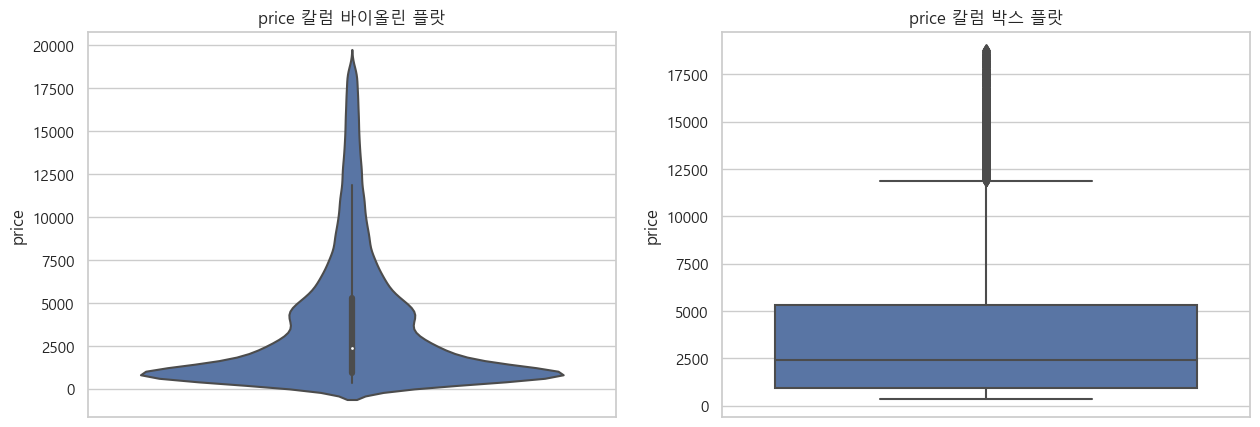

In [143]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))

font_path = r"C:\Windows\Fonts\MALGUN.TTF" #폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.subplot(1, 2, 1)
sns.violinplot(y=y_train, label="price")
plt.title("price 칼럼 바이올린 플랏")

plt.subplot(1, 2, 2)
sns.boxplot(y=y_train)
plt.title("price 칼럼 박스 플랏")

plt.show()

## 선형 회귀

### Step 1) 독립 변수 선택

In [154]:
x_train["price"] = y_train

In [95]:
x_train.corr()["price"].sort_values(ascending=False)

price    1.000000
carat    0.921702
x        0.884747
y        0.860512
z        0.858006
table    0.126328
depth   -0.007623
Name: price, dtype: float64

In [104]:
plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

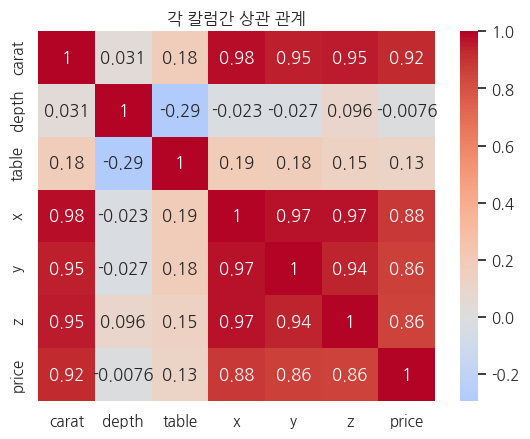

In [110]:
sns.heatmap(x_train.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("각 칼럼간 상관 관계")
plt.show()

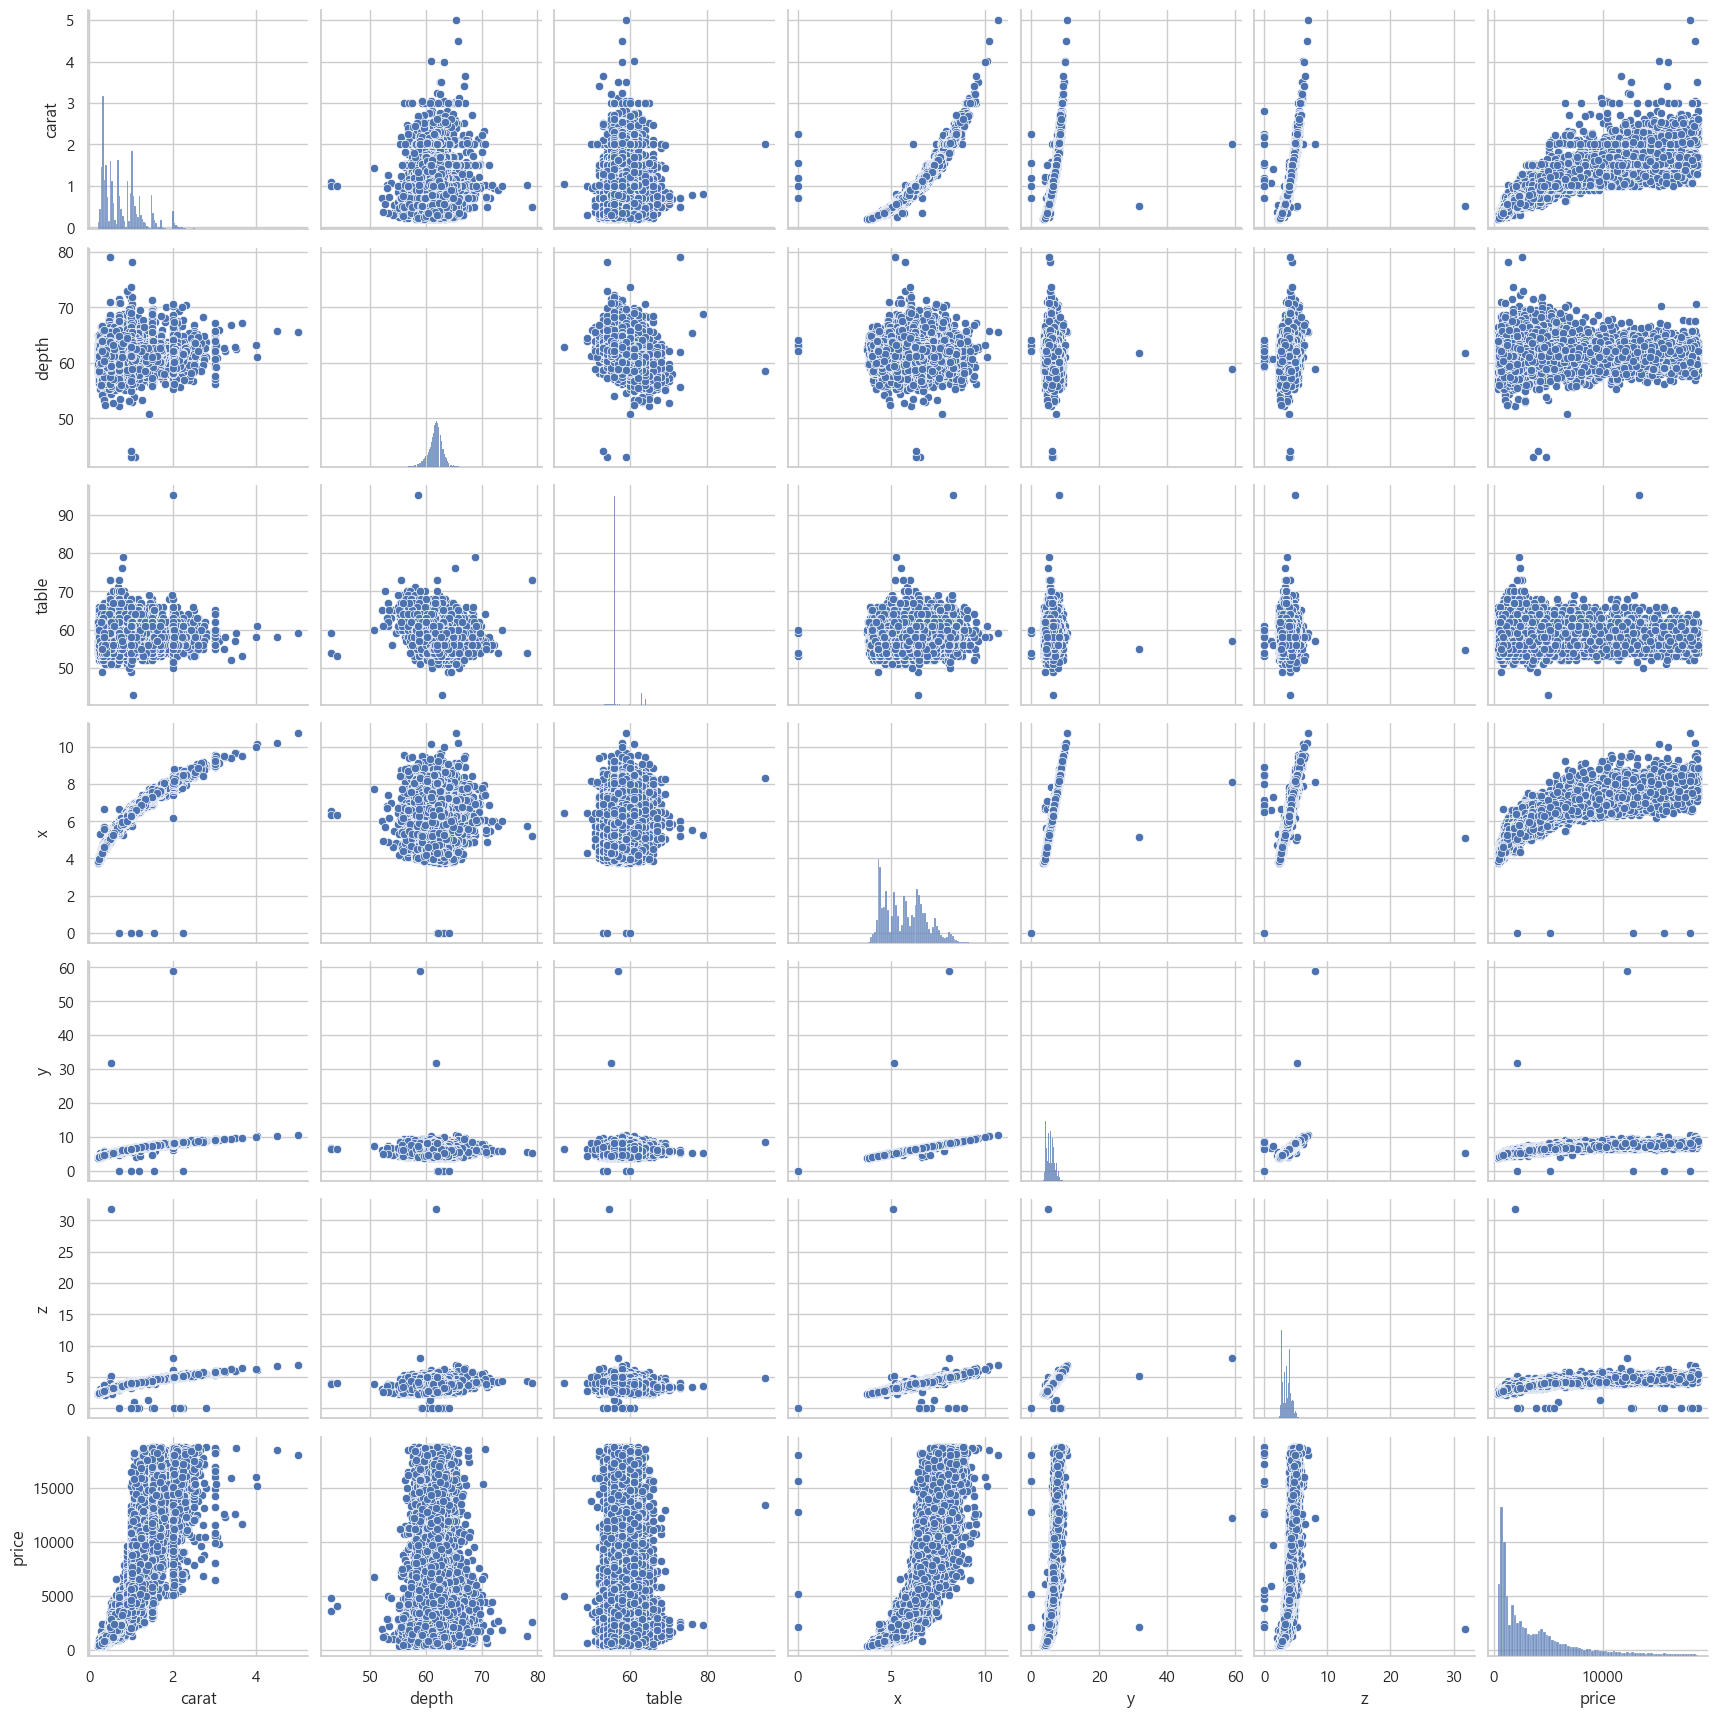

In [155]:
sns.pairplot(x_train)
plt.savefig("./data/pairplot.png")
plt.show()

### 선형 회귀식 도출

In [119]:
import statsmodels.api as sm

x_train_carat = x_train["carat"]
x_test_carat = x_test["carat"]

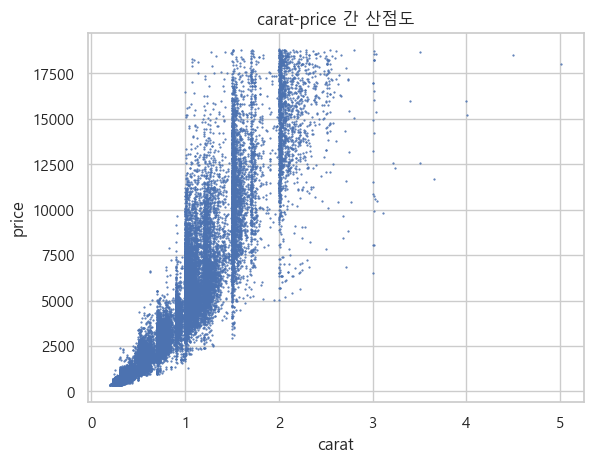

In [147]:
plt.scatter(x_train_carat, y_train, s=0.3)
plt.xlabel("carat")
plt.ylabel("price")
plt.title("carat-price 간 산점도")
plt.show()

#s=0.1 점 하나의 크기를 0.1로

In [121]:
x_constant_train = sm.add_constant(x_train_carat, has_constant="add")
x_constant_train

,const,carat
5463,1.0,1.23
13984,1.0,1.24
9681,1.0,1.00
9473,1.0,1.03
37376,1.0,0.40
...,...,...
32399,1.0,0.38
17048,1.0,0.30
23924,1.0,2.01
34086,1.0,0.36


In [122]:
model = sm.OLS(y_train, x_constant_train)
results = model.fit()

In [123]:
results.params #도출된 회귀식과 절편값

const   -2249.346203
carat    7752.926912
dtype: float64

In [124]:
const = results.params["const"]
weight = results.params["carat"]
const, weight

(-2249.346202571949, 7752.92691186111)

In [125]:
#학습한 회귀식 시각화

y_train_pred = results.predict(x_constant_train)
y_train_pred

5463      7286.753899
13984     7364.283168
9681      5503.580709
9473      5736.168517
37376      851.824562
             ...     
32399      696.766024
17048       76.531871
23924    13334.036890
34086      541.707486
27439    13566.624698
Length: 43152, dtype: float64

Text(0, 0.5, 'price')

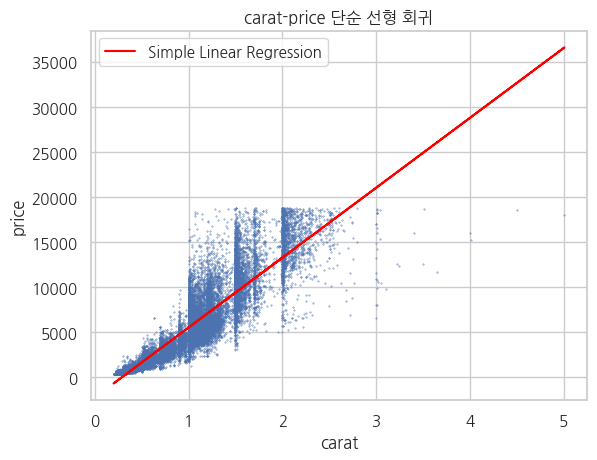

In [127]:
plt.scatter(x_train_carat, y_train, s=0.1)
plt.plot(x_train_carat, y_train_pred, color="red", label="Simple Linear Regression")
plt.title("carat-price 단순 선형 회귀")
plt.legend()
plt.xlabel("carat")
plt.ylabel("price")

### Step 3) 설명력 확인

In [144]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 2.436e+05
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:04:20   Log-Likelihood:            -3.7804e+05
No. Observations:               43152   AIC:                         7.561e+05
Df Residuals:                   43150   BIC:                         7.561e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2249.3462     14.549   -154.602      0.000   -2277.863   -2220.829
carat       7752.9269     15.707    493.585      0.000    7722.140    7783.714
==============================================================================
Omnibus:                    11106.645   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123819.391
Skew:                           0.920   Prob(JB):                         0.00
Kurtosis:                      11.092   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

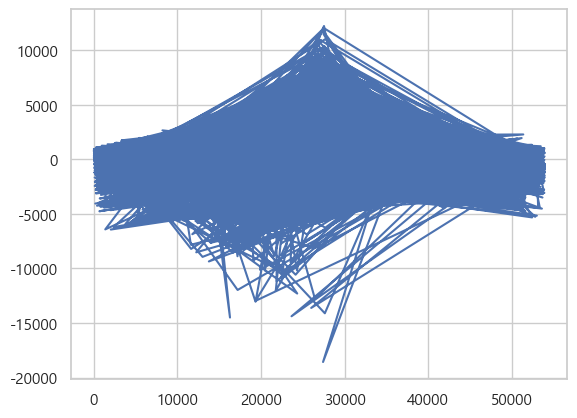

In [157]:
results.resid.plot()
plt.show()

In [166]:
x_constant_test = sm.add_constant(x_test_carat)
y_test_pred = results.predict(x_constant_test)

In [167]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("train set R2:", r2_score(y_train, y_train_pred))
print("train set RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("test set R2:", r2_score(y_test, y_test_pred))
print("test set RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

train set R2: 0.8495342725667863
train set RMSE: 1543.5239325374996
test set R2: 0.8485175931796348
test set RMSE: 1568.4430601909662


### Step 4) 데이터 전처리

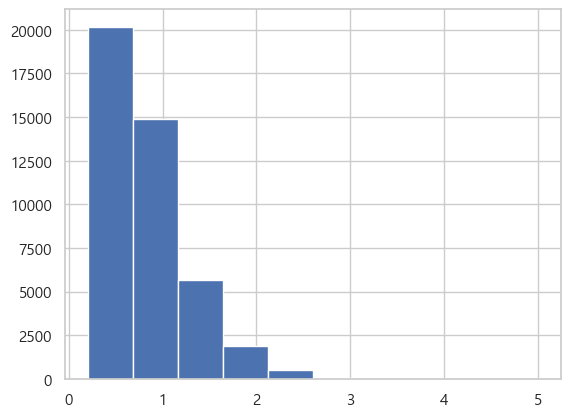

In [162]:
x_train_carat.hist()
plt.show()

In [169]:
x_train_carat = np.log1p(x_train_carat)

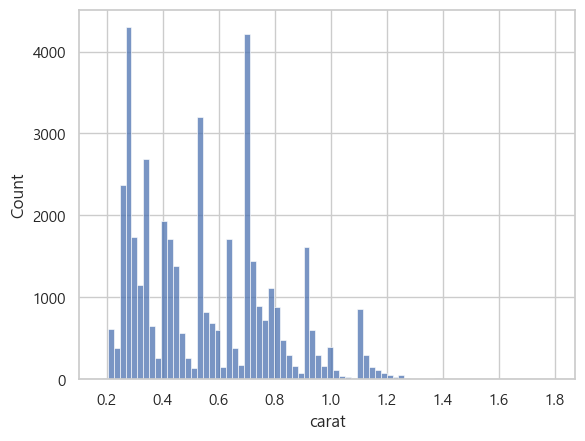

In [171]:
sns.histplot(data=x_train_carat)
plt.show()

In [185]:
x_train_carat

5463     0.802002
13984    0.806476
9681     0.693147
9473     0.708036
37376    0.336472
           ...   
32399    0.322083
17048    0.262364
23924    1.101940
34086    0.307485
27439    1.111858
Name: carat, Length: 43152, dtype: float64

In [172]:
y_train = np.log1p(y_train)

In [186]:
y_train

5463     8.252185
13984    8.647344
9681     8.444622
9473     8.434681
37376    6.890609
           ...   
32399    6.674561
17048    6.418365
23924    9.396737
34086    6.748760
27439    9.801842
Name: price, Length: 43152, dtype: float64

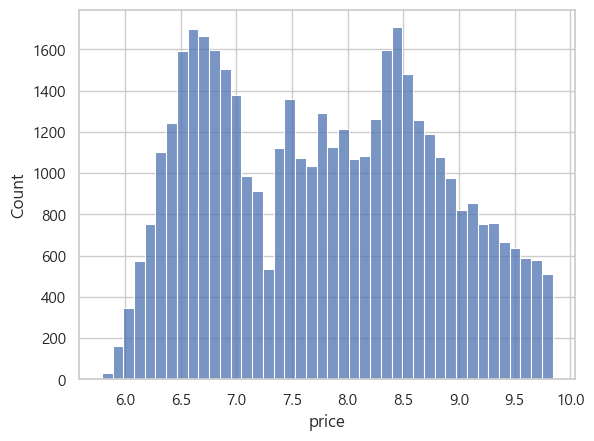

In [173]:
sns.histplot(data=y_train)
plt.show()

In [174]:
x_constant_train = sm.add_constant(x_train_carat, has_constant="add")
x_constant_train

,const,carat
5463,1.0,0.802002
13984,1.0,0.806476
9681,1.0,0.693147
9473,1.0,0.708036
37376,1.0,0.336472
...,...,...
32399,1.0,0.322083
17048,1.0,0.262364
23924,1.0,1.101940
34086,1.0,0.307485


In [175]:
model = sm.OLS(y_train, x_constant_train)
results = model.fit()

In [178]:
const = results.params["const"]
weight = results.params["carat"]
const, weight

(5.5919906208795584, 3.955153185364173)

In [179]:
y_train_pred = results.predict(x_constant_train)
y_train_pred

5463     8.764030
13984    8.781726
9681     8.333494
9473     8.392381
37376    6.922790
           ...   
32399    6.865880
17048    6.629681
23924    9.950332
34086    6.808140
27439    9.989557
Length: 43152, dtype: float64

Text(0, 0.5, 'price')

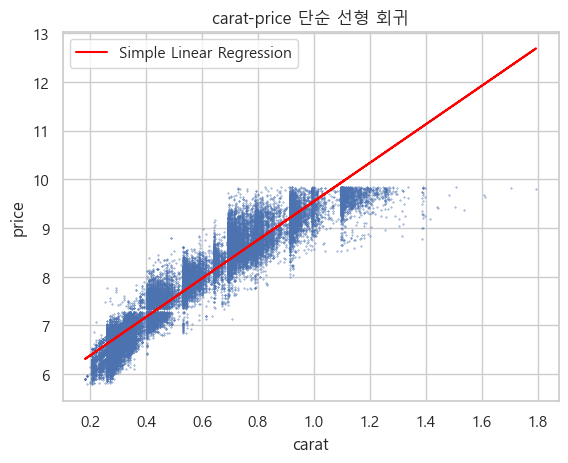

In [180]:
plt.scatter(x_train_carat, y_train, s=0.1)
plt.plot(x_train_carat, y_train_pred, color="red", label="Simple Linear Regression")
plt.title("carat-price 단순 선형 회귀")
plt.legend()
plt.xlabel("carat")
plt.ylabel("price")

In [184]:
x_constant_test

,const,carat
18197,1.0,1.57
34622,1.0,0.31
42495,1.0,0.51
40139,1.0,0.70
3872,1.0,0.90
...,...,...
3677,1.0,0.70
28410,1.0,0.35
16452,1.0,1.09
49453,1.0,0.52


In [188]:
x_test_carat = np.log1p(x_test_carat)
y_test = np.log1p(y_test)

In [189]:
x_constant_test = sm.add_constant(x_test_carat)
y_test_pred = results.predict(x_constant_test)


print("train set R2:", r2_score(y_train, y_train_pred))
print("train set RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("test set R2:", r2_score(y_test, y_test_pred))
print("test set RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

train set R2: 0.9094225738031709
train set RMSE: 0.3053699186144352
test set R2: 0.9082275393632183
test set RMSE: 0.3065309174336341


In [191]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 4.332e+05
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:08:03   Log-Likelihood:                -10042.
No. Observations:               43152   AIC:                         2.009e+04
Df Residuals:                   43150   BIC:                         2.010e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5920      0.004   1535.471      0.000       5.585       5.599
carat          3.9552      0.006    658.208      0.000       3.943       3.967
==============================================================================
Omnibus:                     2355.331   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6775.906
Skew:                          -0.272   Prob(JB):                         0.00
Kurtosis:                       4.864   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 변수 변경

In [190]:
x_train

,carat,depth,table,x,y,z,price
5463,1.23,61.9,60.6,6.79,6.85,4.22,3835
13984,1.24,61.2,57.0,7.02,6.87,4.25,5694
9681,1.00,62.5,56.0,6.38,6.41,4.00,4649
9473,1.03,61.1,59.0,6.56,6.50,3.99,4603
37376,0.40,62.4,56.0,4.70,4.73,2.94,982
...,...,...,...,...,...,...,...
32399,0.38,61.6,56.0,4.68,4.71,2.89,791
17048,0.30,62.1,55.0,4.31,4.35,2.69,612
23924,2.01,62.1,56.0,8.08,8.03,5.00,12048
34086,0.36,60.4,58.0,4.64,4.67,2.81,852


In [181]:
def predict_y_by_column(x_train, y_train, column): 
    x_constant_train = sm.add_constant(x_train, has_constant="add") #상수항 추가

    model = sm.OLS(y_train, x_constant_train)
    results = model.fit()
    
    const = results.params["const"]
    weight = results.params[column]

    y_train_pred = results.predict(x_constant_train)

    return results, y_train_pred

In [194]:
def draw_linear_plot(x_train, y_train, y_train_pred, column):
    plt.scatter(x_train, y_train, s=0.2)
    plt.plot(x_train, y_train_pred, color="red", label="Simple Linear Regression")
    plt.title(f"{column}-price 단순 선형 회귀")
    plt.legend()
    plt.xlabel(column)
    plt.ylabel("price")
    plt.show()

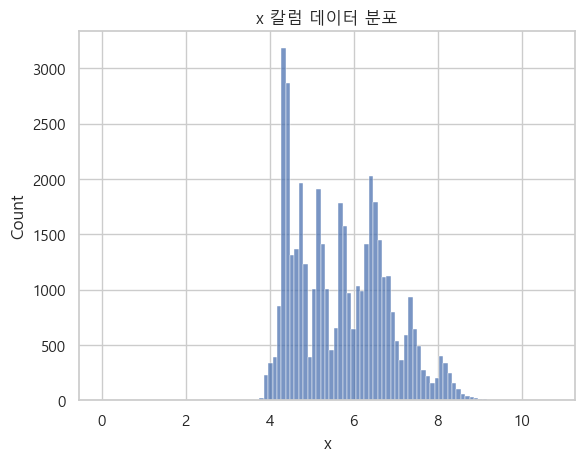

In [206]:
sns.histplot(data=x_train["x"])
plt.title("x 칼럼 데이터 분포")
plt.show()

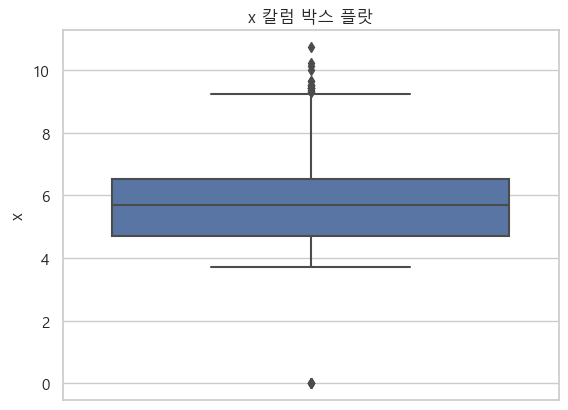

In [207]:
sns.boxplot(y=x_train["x"])
plt.title("x 칼럼 박스 플랏")
plt.show()

In [217]:
x_train

,carat,depth,table,x,y,z,price
5463,1.23,61.9,60.6,6.79,6.85,4.22,3835
13984,1.24,61.2,57.0,7.02,6.87,4.25,5694
9681,1.00,62.5,56.0,6.38,6.41,4.00,4649
9473,1.03,61.1,59.0,6.56,6.50,3.99,4603
37376,0.40,62.4,56.0,4.70,4.73,2.94,982
...,...,...,...,...,...,...,...
32399,0.38,61.6,56.0,4.68,4.71,2.89,791
17048,0.30,62.1,55.0,4.31,4.35,2.69,612
23924,2.01,62.1,56.0,8.08,8.03,5.00,12048
34086,0.36,60.4,58.0,4.64,4.67,2.81,852


In [233]:
x_test.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [235]:
x_train["price"] = y_train
x_test["price"] = y_test

In [236]:
y_train = x_train[x_train["x"] != 0]["price"]
y_test = x_test[x_test["x"] != 0]["price"]

x_train_x = x_train[x_train["x"] != 0]["x"]
x_test_x = x_test[x_test["x"] != 0]["x"]

In [237]:
x_train_x = np.log1p(x_train_x)
x_test_x = np.log1p(x_test_x)

y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [238]:
results, y_train_pred = predict_y_by_column(x_train_x, y_train, "x")

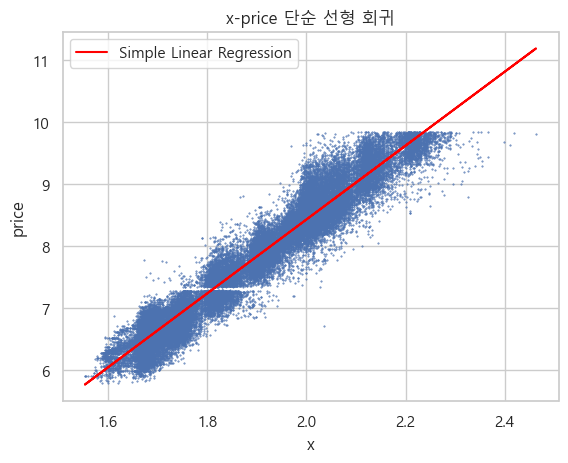

In [239]:
draw_linear_plot(x_train_x, y_train, y_train_pred, "x")

In [240]:
x_constant_test = sm.add_constant(x_test_x)
y_test_pred = results.predict(x_constant_test)


print("train set R2:", r2_score(y_train, y_train_pred))
print("train set RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("test set R2:", r2_score(y_test, y_test_pred))
print("test set RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

train set R2: 0.9332129204715472
train set RMSE: 0.26220082101128184
test set R2: 0.9321685090594454
test set RMSE: 0.2635515494393894


In [223]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 6.029e+05
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:33:43   Log-Likelihood:                -3464.4
No. Observations:               43147   AIC:                             6933.
Df Residuals:                   43145   BIC:                             6950.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4876      0.015   -239.318      0.000      -3.516      -3.459
x              5.9559      0.008    776.443      0.000       5.941       5.971
==============================================================================
Omnibus:                      720.475   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1441.903
Skew:                           0.037   Prob(JB):                         0.00
Kurtosis:                       3.893   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 기타

In [ ]:
y_train = x_train[x_train["x"] != 0]["price"]
y_test = x_test[x_test["x"] != 0]["price"]

x_train_x = x_train[x_train["x"] != 0]["x"]
x_test_x = x_test[x_test["x"] != 0]["x"]